# DASC 512 - 16 - Central Limit Theorem

***

The focus of these Python examples will be demonstration of the **Central Limit Theorem**. 

## Central Limit Theorem

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

sns.set_style('whitegrid')

In [2]:
# Set the assumed sampling distribution
mu = 2
std = np.sqrt(1/9)
samp_dist = stats.norm(loc=mu, scale=std)

In [3]:
# Probability of observing at least 3.2?
samp_dist.sf(x=3.2)

0.0001591085901575332

In [4]:
# Sanity check: how far from the mean is this observation? Standardizing helps!
z = (3.2 - mu) / std
z

3.6000000000000005

In [5]:
# Yes, 3.6 standard deviations from the mean is pretty extreme!
stats.norm.sf(x=3.6)  # Note the default loc and scale are 0 and 1

0.00015910859015753364

### Simulation of Uniform Distribution

In [6]:
# Set up experiment
n = 10  # Number of observations within each sample
bigN = 1000  # Number of samples to take

In [7]:
# Set up distribution
a = 0
b = 1
dist = stats.uniform(loc=a, scale=b-a)  # U(0,1)

In [8]:
# Setting a random seed ensures we always get the same values
# This must run before every simulation for that to work (does not reset otherwise)
np.random.seed(101)

# Run experiment
means = [np.mean(dist.rvs(size=n)) for _i in range(bigN)]  # _i to specify that I won't be calling it

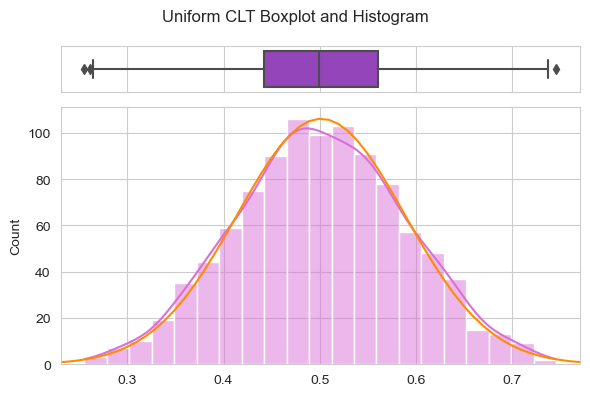

In [9]:
# Plot sample distribution and compare to normal
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': (0.15,0.85)})
fig.suptitle('Uniform CLT Boxplot and Histogram')  # fig.suptitle a useful method for subplots
sns.boxplot(x=means, ax=ax1, color='darkorchid')
sns.histplot(x=means, ax=ax2, color='orchid', kde=True)
fig.tight_layout(pad=1.08)  # Useful function to tighten/loosen spacing in subplots

# Add normal plot for comparison
mu = np.mean(means)
sigma = np.std(means)
xlim = ax2.get_xlim()  # Record current x-limits on plot
pdf_x = np.arange(0.95*xlim[0], 1.05*xlim[1], .01)
pdf_norm = [stats.norm.pdf(x=x, loc=mu, scale=sigma) for x in pdf_x]
pdf_scaled = np.multiply(pdf_norm, ax2.get_ylim()[1] / (1.05*max(pdf_norm)))  # Scale to histogram
ax2.plot(pdf_x, pdf_scaled, color='darkorange')
ax2.set_xlim(xlim)  # Reset x-limits that will have been stretched for the normal plot

plt.show()

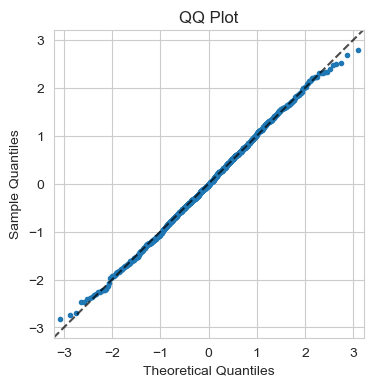

In [10]:
# Assessing normality with a Quantile-Quantile (Q-Q) Plot
import statsmodels.api as sm

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('QQ Plot')
pp = sm.ProbPlot(data=np.array(means), dist=stats.norm, fit=True)
qq = pp.qqplot(marker='.', ax=ax)
sm.qqline(ax=ax, line='45', color='black', alpha=0.7, linestyle='--')
plt.show()

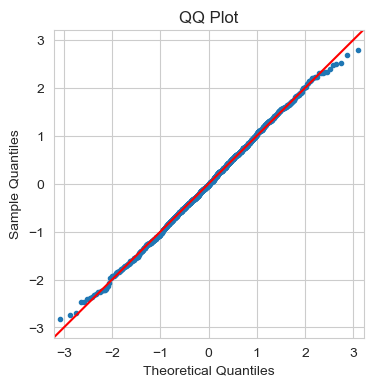

In [11]:
# Shorter method, all at once but not as customizable
import statsmodels.graphics.api as smg
fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('QQ Plot')
smg.qqplot(data=np.array(means), line='45', fit=True, ax=ax, marker='.')
plt.show()

### Plotting other distributions

In [17]:
# Creating a function to execute simulation
def run_exp(
    dist, 
    n=10, 
    bigN=1000, 
    seed=None,
    kde=True
):
    '''
    Runs a simulation of "bigN" sample means from sample of size "n", using random seed "seed", from distribution "dist"
    '''
    import numpy as np
    import statsmodels.api as sm
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    # Run experiment
    np.random.seed(seed)
    means = [np.mean(dist.rvs(size=n)) for _i in range(bigN)]
    
    # Plot results
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(6,4), sharex=True, gridspec_kw={'height_ratios': (0.15,0.85)})
    fig.suptitle('CLT Boxplot and Histogram') 
    sns.boxplot(x=means, ax=ax1, color='darkorchid')
    sns.histplot(x=means, ax=ax2, color='orchid', kde=kde)
    fig.tight_layout(pad=1.08)
    
    # Add normal plot for comparison
    mu = np.mean(means)
    sigma = np.std(means)
    xlim = ax2.get_xlim()  # Record current x-limits on plot
    pdf_x = np.linspace(0.95*xlim[0], 1.05*xlim[1], 1000)
    pdf_norm = [stats.norm.pdf(x=x, loc=mu, scale=sigma) for x in pdf_x]
    pdf_scaled = np.multiply(pdf_norm, ax2.get_ylim()[1] / (1.05*max(pdf_norm)))  # Scale to histogram
    ax2.plot(pdf_x, pdf_scaled, color='darkorange')
    ax2.set_xlim(xlim)  # Reset x-limits that will have been stretched for the normal plot
    
    plt.show()
    
    # Also do a QQ plot
    fig, ax = plt.subplots(figsize=(4,4))
    ax.set_title('QQ Plot')
    pp = sm.ProbPlot(data=np.array(means), dist=stats.norm, fit=True)
    qq = pp.qqplot(marker='.', ax=ax)
    sm.qqline(ax=ax, line='45', alpha=0.7, fmt='k--')
    
    plt.show()

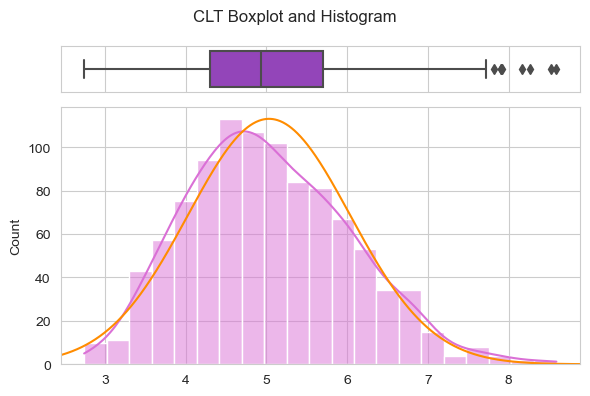

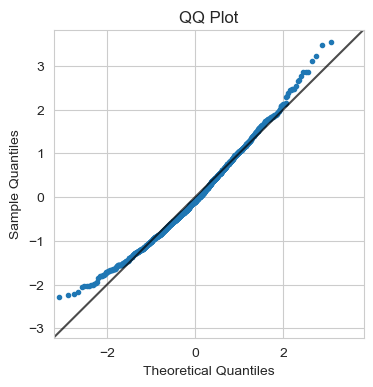

In [18]:
# Chi Squared
df = 5
dist = stats.chi2(df=df)
run_exp(dist=dist, n=10, seed=101)

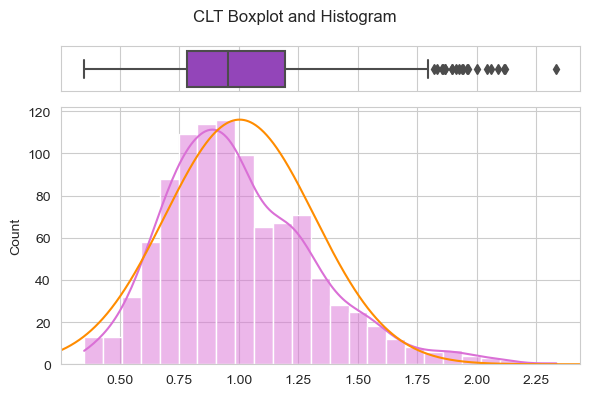

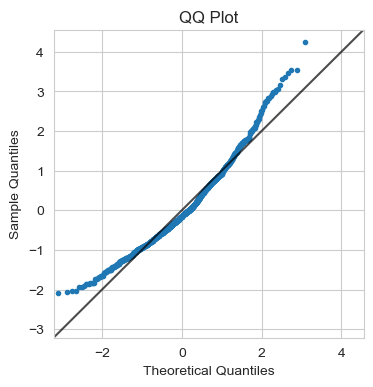

In [19]:
# Exponential
lamb = 1
dist = stats.expon(scale = 1/lamb)
run_exp(dist=dist, n=10, seed=101)

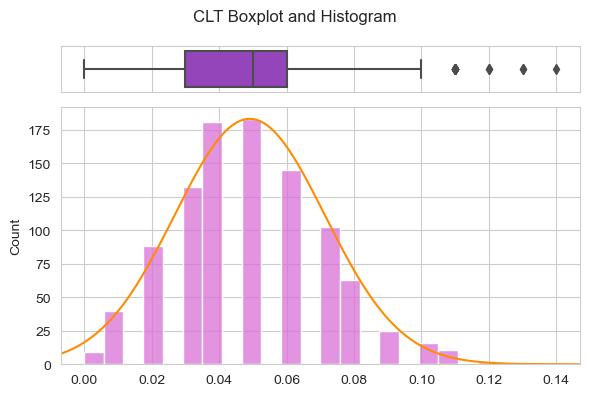

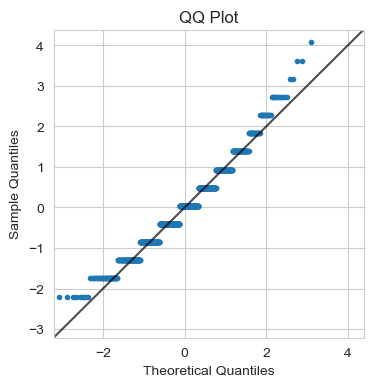

In [20]:
# Bernoulli
p = 1/20
dist = stats.bernoulli(p=p)
run_exp(dist=dist, n=100, kde=False, seed=101)

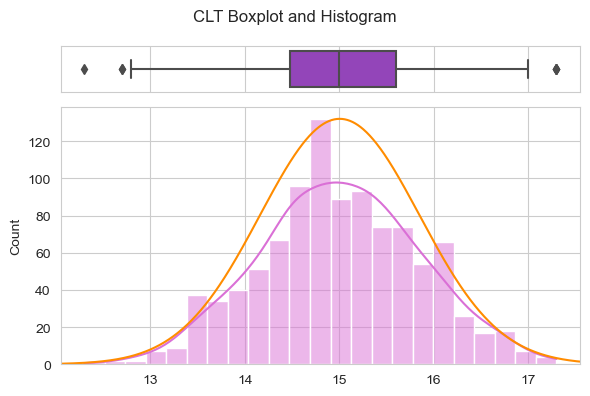

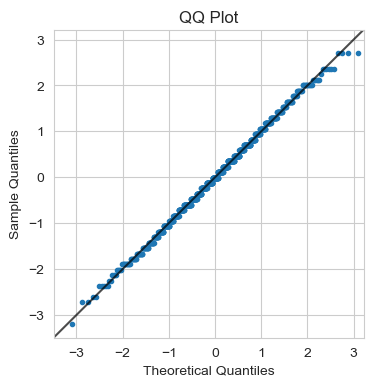

In [21]:
# Binomial
p = 0.5
n = 30
dist = stats.binom(p=p, n=n)
run_exp(dist=dist, n=10, seed=101)